# __Projet Numerique 2: __Choix du pas de temps
---



In [17]:
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib; 
from matplotlib.pyplot import *
import seaborn as sns
sns.set()
%matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np 

## Pas fixe:

**Euler explicite**
Soit $x$ une fonction $C^{1}$ solution du `problème de Cauchy` sur l'intervalle $I $ suivant:

> $\forall t \in I, x'(t) = f(t,x(t)) $  
> $x(t_{0}) = x_{0}$

$x$ est donc solution de l'équation intégrale suivante : $ x(t +dt) = x(t)$ $+$ $ \int_{t_{0}}^t f(s,x(s))ds$

On approxime l'intégrale par l'aire d'un rectangle de hauteur determinée par la valeur de $f$ en $t$  

On a donc $x(t + dt) \sim x(t) + f(t,x(t)) \times dt$

**Solve_euler_explicite**  

On implémente le schéma d'Euler.  
On ajoute aux spécifications de l'énoncé deux variables d'entrée: un $t_{0}$ et un horizon de temps  

La fonction a donc pour spécifications:  
> $ function \to float \to float \to float \to float \to list * list $

In [18]:
def solve_euler_explicite(f, x0, dt, t0=0, tf=2):
    t = t0
    x = x0
    liste_t = [t0]
    liste_x = [x0]
    while t < tf:
        x = x + dt * f(t, x)
        t += dt
        liste_t.append(t)
        liste_x.append(x)
        
    return liste_t, liste_x


**Test**

<IPython.core.display.Javascript object>


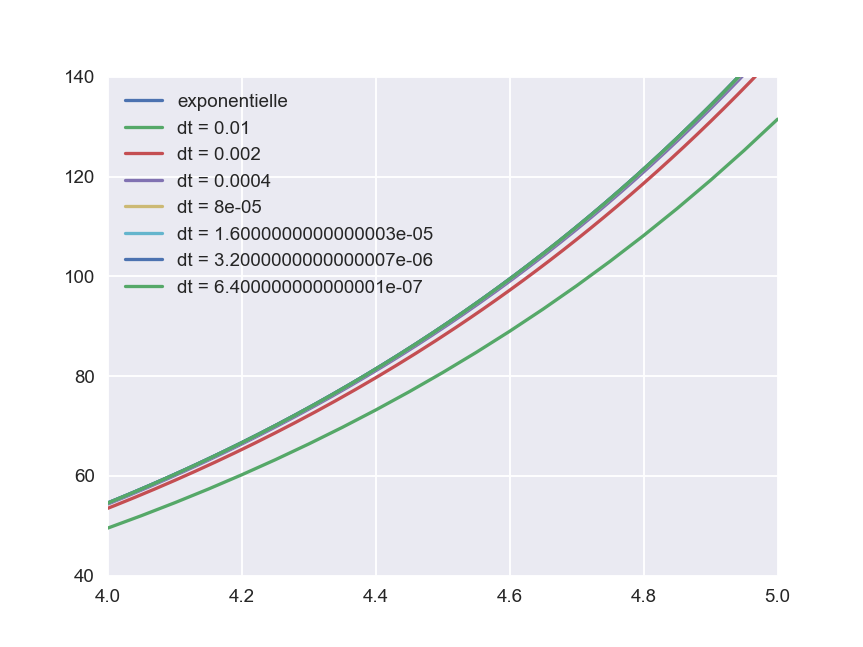

In [19]:
#On teste notre schéma sur plusieurs fonctions connues:
#exponentielle
def expo(t,x):
    return x

def illustration(f, x0, t0 = 0, tf = 2):
    dt = (tf - t0)/100
    while dt > 10**(-6):
        t, x = solve_euler_explicite(f, x0, dt, t0, tf)
        dt = dt / 5
        if (abs(t[-1] -tf)) > abs(t[-2]-tf):
            plt.plot(t[0: len(t)-1],x[0: len(t)-1], label = f'dt = {dt}')
        else:
            plt.plot(t,x, label = f'dt = {dt}')
        plt.legend()
        
def test_expo(fin = 5):
    dt = 0.01
    t = 0
    temps = []
    while t < fin:
        temps.append(t)
        t += dt
        
    plt.figure()
    plt.xlim(4.0,5.0)
    plt.ylim(40, 140)
    plt.plot(temps, np.exp(temps), label = 'exponentielle')
    
    illustration(expo, 1, tf = fin )
 
    plt.show()
    
test_expo()

Les courbes se rapprochent progressivement de la solution.  

On cherche à quantifier l'erreur en $tf$ en fonction du pas:

In [20]:
def solve_euler(f, x0, dt, t0=0, tf=2):
    t = t0
    x = x0
    while t < tf:
        x_prec = x
        t_prec = t
        x += dt * f(t, x)
        t += dt  
    if abs(tf - t) > abs(tf - t_prec):
        return t_prec, x_prec
    else:
        return t,x

def test(f, x0, t0 = 0, tf = 2):
    dt = (tf - t0)/100
    valeurfinale = []
    pas = []
    while dt > 10**(-12):
        print(dt)
        pas.append(dt)
        t, x = solve_euler(f, x0, dt, t0, tf)
        dt = dt / 10
        valeurfinale.append(x)
       
    figure()
    plt.plot(pas, 100 * abs(np.array(valeurfinale) - m.exp(tf))/m.exp(tf))
    plt.title("erreur d'approximation (%)")
    plt.xlabel("pas")
    plt.ylabel("erreur (%)")
    plt.legend()
    plt.show()

In [21]:
#test(expo, 1, tf = 3)

Le temps d'execution de la fonction précedente étant un peu long, on fournit ci-dessous la fenêtre graphique qui s'affiche après éxecution. 
On constate bien la convergence du modèle. En raison du temps d'éxecution, je n'ai pas pu descendre à des valeurs de pas plus petites.

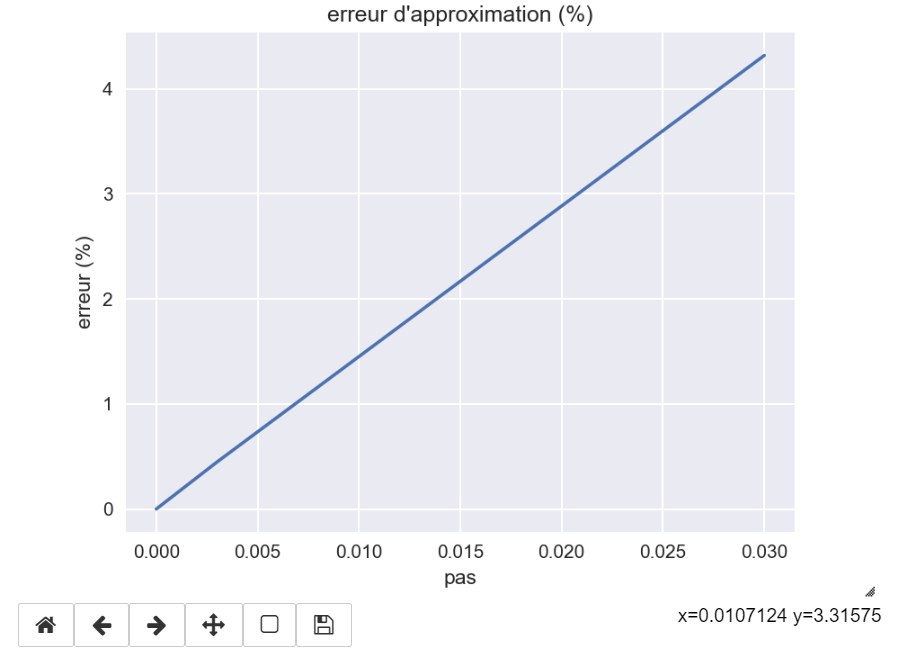

<IPython.core.display.Javascript object>


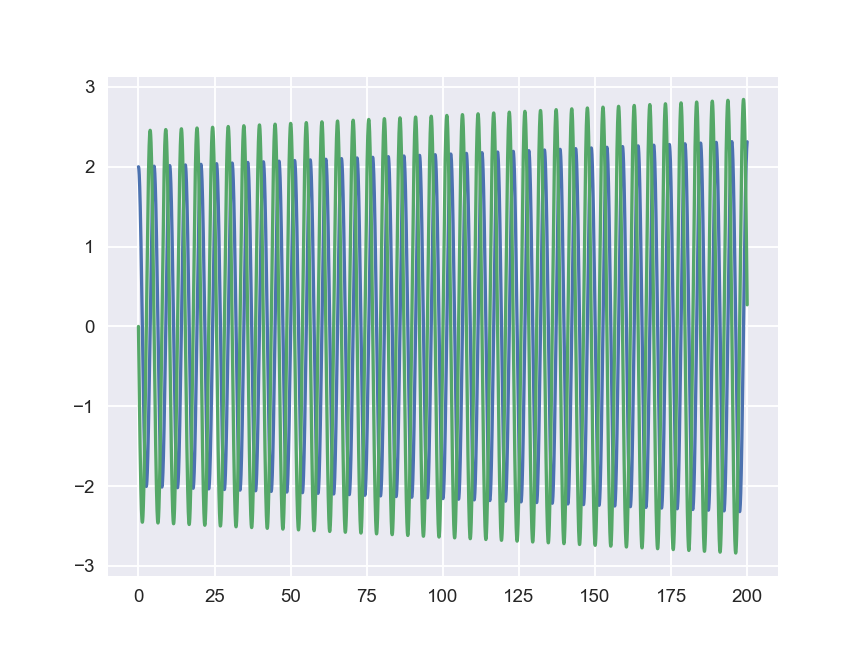

In [22]:
#Oscillateur:
def oscillo(t,x):
    w = 1.5
    return np.array([x[1], -w * x[0]])


def illustrationO(f, x0, t0 = 0, tf = 2):
    dt = (tf - t0)/100
    while dt > 10**(-6):
        t, x = solve_euler_explicite(f, x0, dt, t0, tf)
        dt = dt / 5
        x1 = [a[0] for a in x]
        x2 = [a[1] for a in x ]
        if (abs(t[-1] -tf)) > abs(t[-2]-tf):
            plt.plot(t[0: len(t)-1],x1[0: len(t)-1], label = f'dt = {dt}')
        else:
            plt.plot(t,x1, label = f'dt = {dt}')
        plt.legend()
        
#illustrationO(oscillo, np.array([2,0]), tf = 5 )

t, x = solve_euler_explicite(oscillo, np.array([2,0]), 0.001, t0 = 0, tf = 200)

x1 = [a[0] for a in x]
x2 = [a[1] for a in x ]
        
plt.figure()
plt.plot(t,x1)
plt.plot(t, x2)

plt.show()
    

On constate effectivement que le schéma d'Euler ne conserve pas l'energie (l'amplitude des oscillations augmente).

__Schéma d'odre 2.__   
On choisit la `méthode du point milieu explicite`:  

On rappelle $ x(t +dt) = x(t)$ $+$ $ \int_{t_{0}}^t f(s,x(s))ds$  
On approxime ici l'intégrale par l'aire d'un rectangle de hauteur determinée par la valeur de $f$ en $t + \frac{dt}{2}$  

> On a donc $x(t + dt) \sim x(t) + f(t + \frac{dt}{2}, x(t + \frac{dt}{2})) \times dt$

La valeur en $t + \frac{dt}{2}$ de $x$ est calculée de manière approchée par la méthode d'Euler:  
> $x(t + dt) \sim x(t) + f($ $t + \frac{dt}{2}$ $,$  $ x(t) + \frac{dt}{2}$ $ \times $ $ f(t,x(t))$ $) $ $\times $ $dt$

In [24]:
def solve_pointmilieu(f, x0, dt, t0=0, tf=2):
    t = t0
    x = x0
    liste_t = [t0]
    liste_x = [x0]
    while t < tf:
        x = x +  dt * f(t + dt/2, x + (dt/2)*f(t, x))
        t += dt
        liste_t.append(t)
        liste_x.append(x)
        
    return liste_t, liste_x

<IPython.core.display.Javascript object>


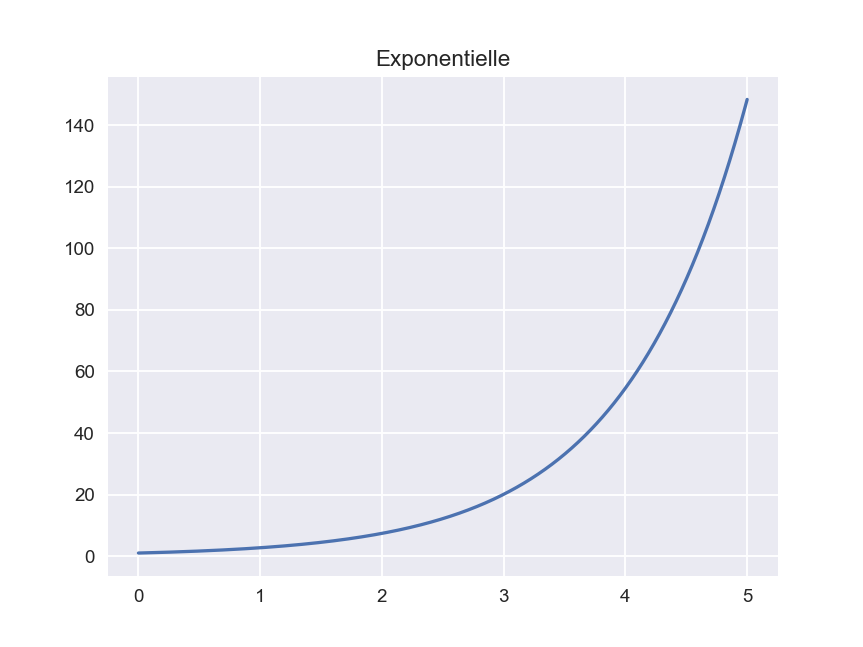

<IPython.core.display.Javascript object>


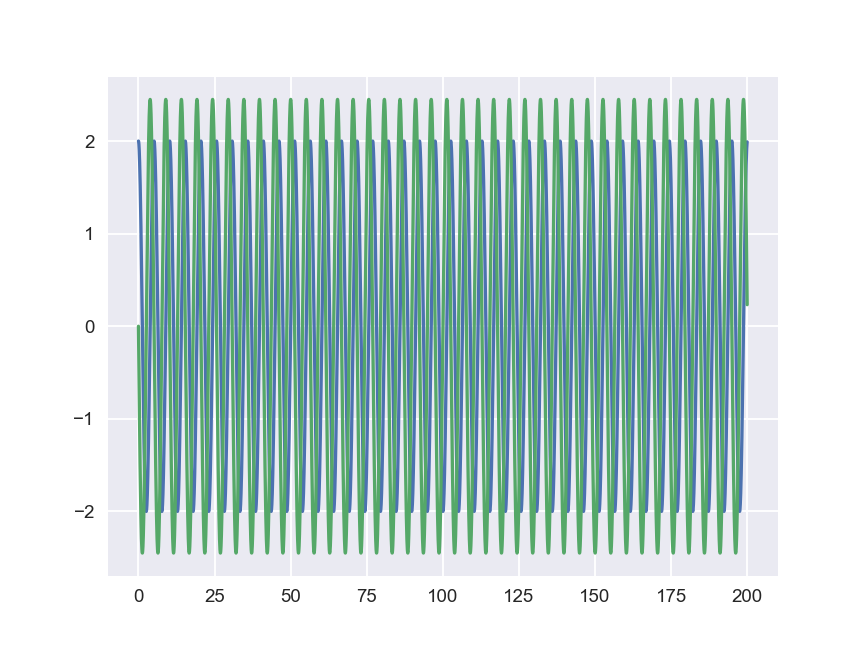

In [25]:
#Exponentielle:
t, x = solve_pointmilieu(expo, 1, 0.001, t0 = 0, tf = 5)
plt.figure()
plt.plot(t,x)
plt.title('Exponentielle')
plt.show()

t, x = solve_pointmilieu(oscillo, np.array([2,0]), 0.001, t0 = 0, tf = 200)
x1 = [a[0] for a in x]
x2 = [a[1] for a in x ]
       
plt.figure()
plt.plot(t,x1)
plt.plot(t, x2)

plt.show()

Ce schéma ne conserve pas l'energie non plus, mais il converge plus vite.

___
## Adaptation du pas de temps

__Estimation de l'erreur locale__  

A l'itération $j$, on définit la fonction $\hat{x}$ solution du problème de Cauchy suivant:  
>$\hat{x} ' = f(t, \hat{x})$  
>$\hat{x}(t_{j}) = x^{j}$

$\hat{x}$ est donc solution de l'équation intégrale suivante : $ \hat{x}(t) = x^{j}$ $+$ $ \int_{t_{j}}^t f(s,\hat{x}(s))ds$  
Et l'erreur locale dûe à l'approximation de l'intégrale est donnée par:  
> $e^{j+1} = \hat{x}(t_{j+1}) - x^{j+1}$ $=$ $\biggl( x^{j}$ $+$ $ \int_{t_{j}}^{t_{j+1}} f(s,\hat{x}(s))ds \biggr) -$ $ x^{j+1}$  


___
__On suppose que $f$ est $C^{1}$.  
Montrons que pour un `schéma d'Euler`, $e^{j+1} = \Delta{t}$ $\frac{f(t_{j+1},x^{j+1}) - f(t_{j},x^{j})}{2}$ $+$ $ O(\Delta{t_{j}}^{3})$__  
___

$f$ est $C^{1}$ donc $\hat{x}$ est de classe $C^{2}$ 
D'après le `Théorème de Taylor`, on a donc :  
> $\hat{x}(t + dt) = \hat{x}(t) + f(t, \hat{x}(t))dt + \frac{1}{2} \frac{df(t, \hat{x}(t))}{dt}(t) dt^{2}$ $+$ $o(dt^{2})$

(On aimerait un $O(dt^{3})$, mais, si cela est évident dans le cas où $f$ serait $C^{2}$, je ne sais pas comment le montrer ici. On considèrera pour les besoins de l'énoncé que ce $o(dt^{2})$ est bien un $O(dt^{3})$)

En prenant $dt = t_{j+1} - t_{j} = \Delta{x_{j}}$:  
>  $\hat{x}(t_{j+1}) = \hat{x}(t_{j}) + f(t_{j}, \hat{x}(t_{j}))dt + \frac{1}{2} \frac{d f(t, \hat{x}(t))}{dt}(t_{j}) dt^{2}$ $+$ $O(\Delta{t_{j}}^{3})$  

> $ie$    $\hat{x}(t_{j+1}) = x^{j} + f(t_{j}, x^{j})dt + \frac{1}{2}\biggl(\frac{\partial{f}}{\partial{t}}(t_{j}, x^{j}) + f(t_{j}, x^{j})\frac{\partial{f}}{\partial{x}}(t_{j}, x^{j})\biggr)\times dt^{2}$ $+$ $O(\Delta{t_{j}}^{3})$  

Or le premier terme $x^{j} + f(t_{j}, x^{j})dt$ est égal à $x^{j+1}$ pour un `schéma d'Euler`.  

Le second terme $\biggl(\frac{\partial{f}}{\partial{t}}(t_{j}, x^{j}) + f(t_{j}, x^{j})\frac{\partial{f}}{\partial{x}}(t_{j}, x^{j})\biggr)\times dt^{2}$ vaut $\biggl(\frac{\partial{f}}{\partial{t}}(t_{j}, x^{j})dt + \frac{dx}{dt}(t_{j})dt \times \frac{\partial{f}}{\partial{x}}(t_{j}, x^{j})\biggr)\times dt = \biggl(\frac{\partial{f}}{\partial{t}}(t_{j}, x^{j})\times dt + \frac{\partial{f}}{\partial{x}}(t_{j}, x^{j}) \times dx \biggr)\times dt = df(t_{j}, x^{j}).(\Delta{t_{j}}, (x^{j+1} - x^{j})) \times dt$

On a donc:
> $\hat{x}(t_{j+1}) = x^{j+1} + \frac{1}{2}df(t_{j}, x^{j}).(\Delta{t_{j}}, (x^{j+1} - x^{j})) \times dt$ $+$ $O(\Delta{t_{j}}^{3})$  

Et finalement:  
>$(1)$   $e^{j+1} = \frac{1}{2}df(t_{j}, x^{j}).(\Delta{t_{j}}, \Delta{x_{j}}) \times \Delta{t_{j}} + O(\Delta{t_{j}}^{3})$  


En faisant le développement de Taylor de $f(t_{j+1}, x^{j+1}) = f(t_{j} + \Delta{t_{j}}, x^{j} +\Delta{x_{j}})$  à l'ordre 1 (en supposant $o(\Delta{t_{j}}) = O(\Delta{t_{j}}^{2})$), il vient:  
> $(2)$    $f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j}) = df(t_{j}, x^{j}).(\Delta{t_{j}}, \Delta{x_{j}}) + O(\Delta{t_{j}}^{2})$  

$(1)$ et $(2)$ donnent bien le résultat attendu:  
>  |$e^{j+1} = \Delta{t}$ $\frac{f(t_{j+1},x^{j+1}) - f(t_{j},x^{j})}{2}$ $+$ $ O(\Delta{t_{j}}^{3})$|  
>  |-------------------------------------------------------------------------------------------------|
___

__Montrons que $e^{j+1} = O(\Delta{t_{j}}^{2})$__

$df(t_{j}, x^{j}).(\Delta{t_{j}}, \Delta{x_{j}}) \times \Delta{t_{j}} =  \biggl(\frac{\partial{f}}{\partial{t}}(t_{j}, x^{j}) + f(t_{j}, x^{j})\frac{\partial{f}}{\partial{x}}(t_{j}, x^{j})\biggr)\times \Delta{t_{j}}^{2}$  

$f$ est de classe $C^{1}$ donc $f$, $\frac{\partial{f}}{\partial{t}}$ et $\frac{\partial{f}}{\partial{x}}$ sont continues.
Elles sont donc bornées sur tout compact de leur domaine de définition, donc bornées sur $[t_{j}, t_{j+1}]$ (resp. $[x^{j}, x^{j+1}]$).

Il existe donc une constante $K \in \mathbb{R}$ telle que $|df(t_{j}, x^{j})|$  $<$  $ K $  $\forall (t,x) \in [t_{j}, t_{j+1}] \times [x^{j}, x^{j+1}]$  

(On aurait pu utiliser directement la continuité de $df$ et le `Théorème des accroissement finis`pour majorer $f(t_{j+1},x^{j+1}) - f(t_{j},x^{j})$ )  

On a bien le resultat attendu:  
>  |   $e^{j+1} = O(\Delta{t_{j}}^{2})$   |  
>  |--------------------------------------|


$e^{j+1}$ varie donc comme $\Delta{t_{j}}^{2}$. Pour diviser l'erreur par 4 il faut diviser $\Delta{t_{j}}$ par 2.  
Si $e^{j+1} > Tol_{abs}$, on souhaite diminuer le pas de temps, et inversement si $e^{j+1} < Tol_{abs}$  

Par exemple, si $e^{j+1} = 2 \times Tol_{abs}$, on souhaite diviser l'erreur par 2, donc le pas de temps par $\sqrt{2}$, ce qui revient à multiplier le pas actuel par $\sqrt{\frac{Tol_{abs}}{e^{j+1}}}$  

Une stratégie raisonnable d'adaptation est donc de prendre à chaque itération un nouveau pas de temps $\Delta{t_{j+1}}$ défini par:  
> $\Delta{t_{j+1}} = \Delta{t_{j}} \times \sqrt{\frac{Tol_{abs}}{e^{j+1}}}$  

___

___
__Fonctionnement du solveur__  
On copie le code fourni dans Equations Differentielles II.ipynb

In [52]:
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib; 
from matplotlib.pyplot import *
import seaborn as sns
sns.set()
%matplotlib notebook

def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

__Explication du fonctionnement de ce solveur:__

`while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)`  
On echantillonne la solution à un pas de temps $dtmax$. Les valeurs intermediaires de la solutions qui auront pu être calculées si on adapte le pas de temps ne sont donc pas conservées. A chaque tour de boucle, on adapte $dt$ et on calcule une valeur intermediaire de la fonction $x$ jusqu'à atteindre la valeur à stocker suivante de $x$ (en $t_{stocké} + dtmax$) . La variable `ti`tient le rôle de compteur. On l'incrémente de $dt$ à chaque tour, jusqu'a ce que la somme des intervalles parcourus vaille $dtmax$.  
  
  
`x_back = x_next - dt * f(x_next)
 ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
 dt = 0.9 * dt * sqrt(ratio_abs_error)`  
Le solveur estime la valeur de l'erreur locale en faisant la moyenne des erreurs commises sur une approximation aller-retour entre $x^{j}$ et $x^{j+1}$: On calcule $x^{j+1}$ à partir de $x^{j}$ puis une nouvelle valeur $x^{j}_{prim}$ à partir de $x^{j+1}$, et l'erreur locale due à l'approximation de l'integrale vaut donc $\frac{|x^{j} - x^{j}_{prim}|}{2}$.  
La variable atol est la tolérance $Tol_{abs}$. On modifie $\Delta{t}$ comme vu précedemment (avec une petite marge ($\times 0.9$))  
  
  
`if dt < dtmin:
     raise ValueError("Time step below minimum")
 elif dt > dtmax/2:
     dt = dtmax/2`  
Le pas de temps adaptable doit rester dans l'intervalle $[dtmin, dtmax]$ spécifié par l'utilisateur. Si le pas de temps nécessaire à une approximation correcte est inférieur à dtmin, on arrête la résolution.
  
  
`dt2DT = dtmax - ti # time left to dtmax
     t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)`  
On fait un dernier ajustement pour pour que $x^{j+1}$ corresponde bien à l'approximation de $x(t_{j} + dtmax)$

__Illustration de ce fonctionnement__

On va illustrer l'adaptation du pas de temps sur l'équation differentielle $x' = x$   
On adapte légèrement le solveur à nos desseins:

In [67]:
def solve_ivp_euler_explicit_variable_stepmodif(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    pas = [dt]
    temps = [t0]
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            pas.append(dt)
            temps.append(t_next)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T, pas, temps)


<IPython.core.display.Javascript object>


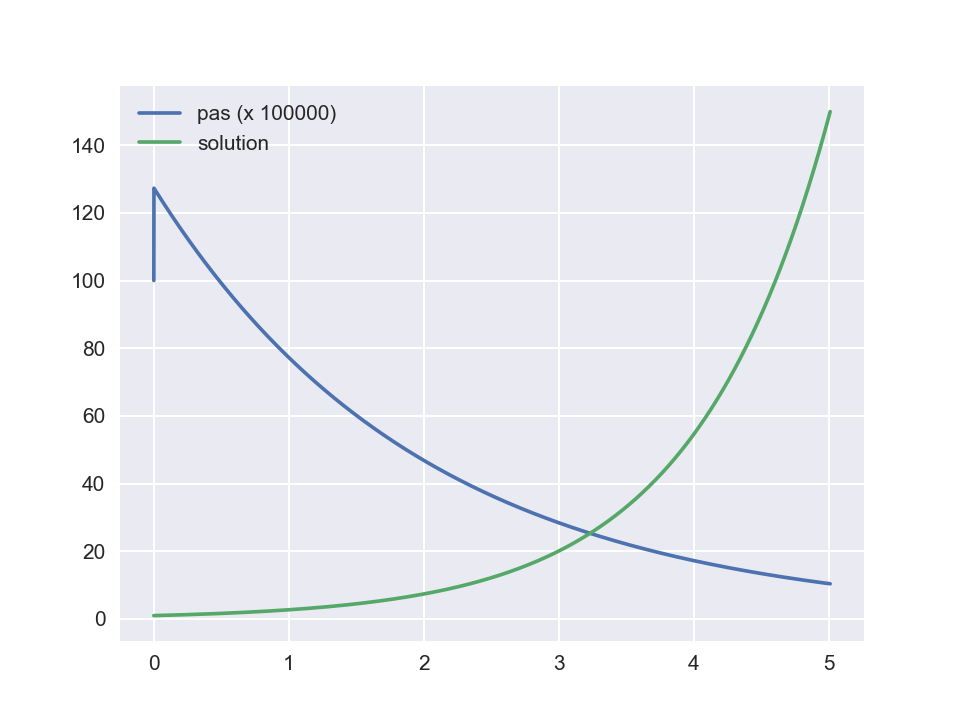

In [82]:
def expo2(x):
    return x

t, x, pas, temps = solve_ivp_euler_explicit_variable_stepmodif(expo2, 0, 1, 5)
figure()
plot(temps, np.array(pas) * 100000, label = 'pas (x 100000)')
plot(temps, np.exp(temps), label = 'solution')
legend()
show()

On observe bien l'adaptation du pas de temps à mesure que la pente de la solution augmente.  

Cas d'un oscillateur:

<IPython.core.display.Javascript object>


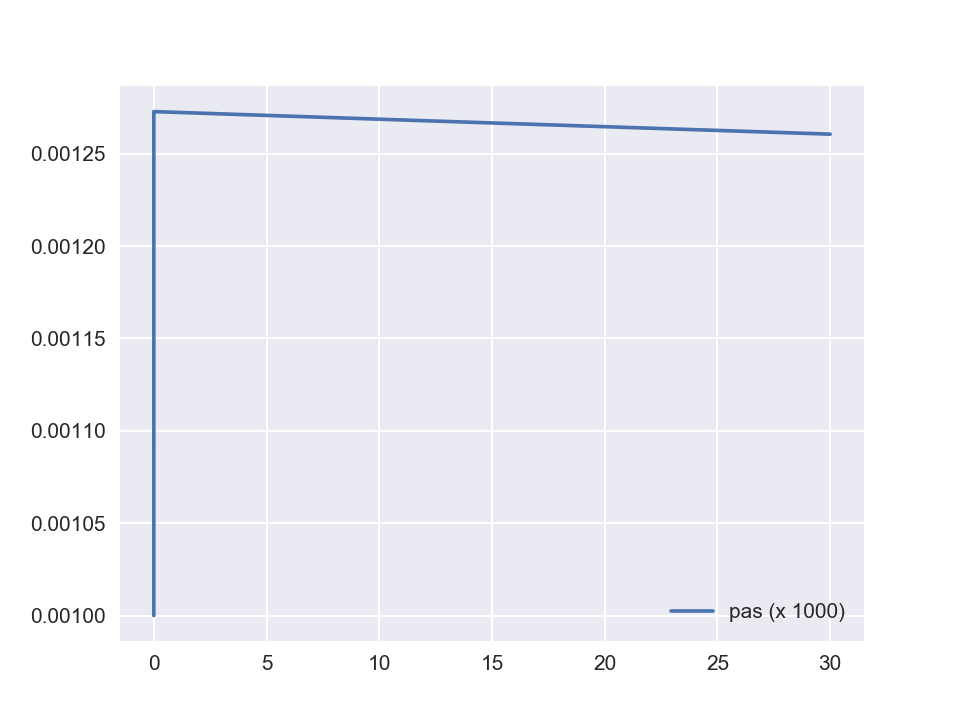

In [81]:
omega = 1

def f(xy):
    x, y = xy
    return array([y, -omega*x])

t0, tf, x0 = 0.0, 30.0, array([-1.0, 0.0])


t, x, pas, temps = solve_ivp_euler_explicit_variable_stepmodif(f, t0, x0, tf)

figure()
plot(temps, np.array(pas) , label = 'pas (x 1000)')
#plot(t, x[0], label = 'solution')

legend()
show()